In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
df=pd.read_csv('Hospital_Readmissions_Reduction_Program.csv')

In [92]:
df.head()

#In October 2012, CMS began reducing Medicare payments for Inpatient Prospective Payment System hospitals 
#with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number
#of “predicted” 30-day readmissions for heart attack, heart failure, pneumonia, chronic obstructive pulmonary disease
#hip/knee replacement, and coronary artery bypass graft surgery by the number that would be “expected,” based on an
#average hospital with similar patients. A ratio greater than 1.0000 indicates excess readmissions.

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810,NaN,0.9875,14.9136,15.1026,120,07/01/2013,06/30/2016
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275,NaN,1.0499,13.3154,12.6826,38,07/01/2013,06/30/2016
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617,NaN,0.9891,18.2801,18.4823,112,07/01/2013,06/30/2016
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053,NaN,0.9506,20.1391,21.1865,209,07/01/2013,06/30/2016
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342,NaN,1.1004,5.3174,4.8322,20,07/01/2013,06/30/2016


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19830 entries, 0 to 19829
Data columns (total 12 columns):
Hospital Name                 19830 non-null object
Provider Number               19830 non-null int64
State                         19830 non-null object
Measure Name                  19830 non-null object
Number of Discharges          19830 non-null object
Footnote                      5435 non-null float64
Excess Readmission Ratio      19830 non-null object
Predicted Readmission Rate    19830 non-null object
Expected Readmission Rate     19830 non-null object
Number of Readmissions        19830 non-null object
Start Date                    19830 non-null object
End Date                      19830 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 1.8+ MB


In [20]:
df['Number of Discharges']

0                  810
1                  275
2                  617
3                 1053
4                  342
5                  656
6        Not Available
7        Not Available
8                  627
9                  362
10                 263
11                 841
12                 395
13                 147
14                 693
15                 885
16                 411
17                 942
18       Not Available
19       Not Available
20                 137
21                  98
22       Not Available
23                 197
24       Not Available
25       Not Available
26       Not Available
27       Not Available
28       Not Available
29       Not Available
             ...      
19800    Not Available
19801    Not Available
19802    Not Available
19803    Not Available
19804    Not Available
19805    Not Available
19806    Not Available
19807    Not Available
19808    Not Available
19809    Not Available
19810    Not Available
19811    Not Available
19812    No

In [181]:
df['Number of Readmissions'].head()

0    120.0
1     38.0
2    112.0
3    209.0
4     20.0
Name: Number of Readmissions, dtype: float64

In [93]:
#plt.scatter(df['Number of Discharges'],df['Expected Readmission Rate'])
try:
    
    float(df['Number of Discharges'][6])
except:
    print("Can't")

Can't


In [63]:
type(int(df['Number of Discharges'][0]))==int

True

In [166]:
def float_conv(x):
    
    try:
        return float(x.strip())
    except:
        
        return np.nan
    
    

In [180]:
(df['Number of Discharges']).head()

0     810.0
1     275.0
2     617.0
3    1053.0
4     342.0
Name: Number of Discharges, dtype: float64

In [132]:
df['Number of Discharges'][1]

0

In [167]:
df['Reason']=df['Measure Name'].apply(lambda x:x.split('-')[2]+'-'+x.split('-')[3])

   
df['Number of Discharges']=df['Number of Discharges'].apply(lambda x:float_conv(x))
df['Number of Readmissions']=df['Number of Readmissions'].apply(lambda x:float_conv(x))



In [174]:
dg=df[['Hospital Name','State','Number of Discharges','Number of Readmissions','Reason']].dropna()

In [178]:
dg['Re_admin_rate']=dg['Number of Readmissions']/dg['Number of Discharges']
dg.head()

,Hospital Name,State,Number of Discharges,Number of Readmissions,Reason,Re_admin_rate
0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,810.0,120.0,AMI-HRRP,0.148148
1,SOUTHEAST ALABAMA MEDICAL CENTER,AL,275.0,38.0,CABG-HRRP,0.138182
2,SOUTHEAST ALABAMA MEDICAL CENTER,AL,617.0,112.0,COPD-HRRP,0.181524
3,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1053.0,209.0,HF-HRRP,0.198481
4,SOUTHEAST ALABAMA MEDICAL CENTER,AL,342.0,20.0,HIP-KNEE,0.058480


<Figure size 1080x360 with 0 Axes>

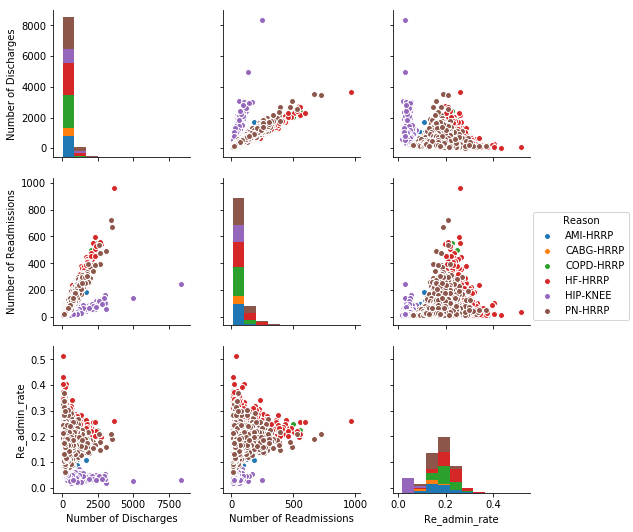

In [186]:
plt.figure(figsize=(15,5))
sns.pairplot(dg,hue='Reason')

<Figure size 1080x360 with 0 Axes>

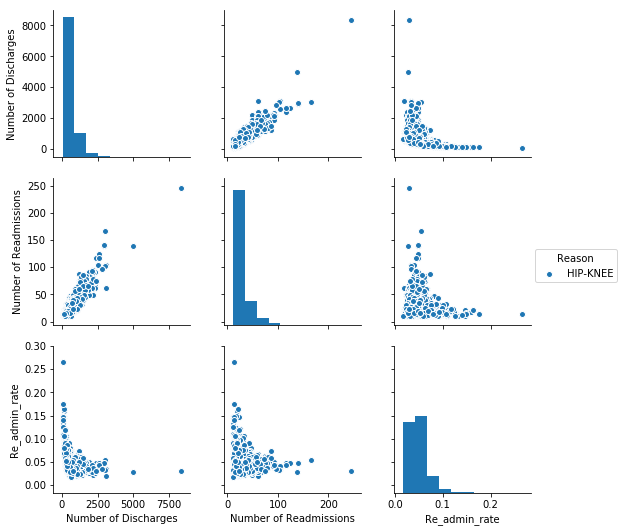

In [187]:
plt.figure(figsize=(15,5))
sns.pairplot(dg[dg['Reason']=='HIP-KNEE'],hue='Reason')

<Figure size 1080x360 with 0 Axes>

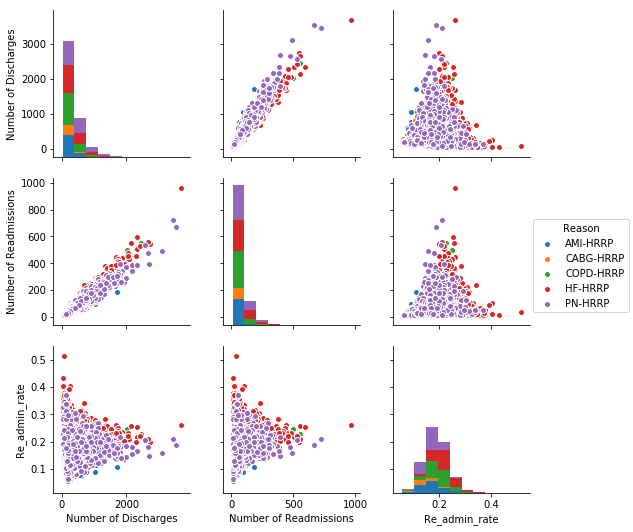

In [188]:
plt.figure(figsize=(15,5))
sns.pairplot(dg[dg['Reason']!='HIP-KNEE'],hue='Reason')

<Figure size 1080x360 with 0 Axes>

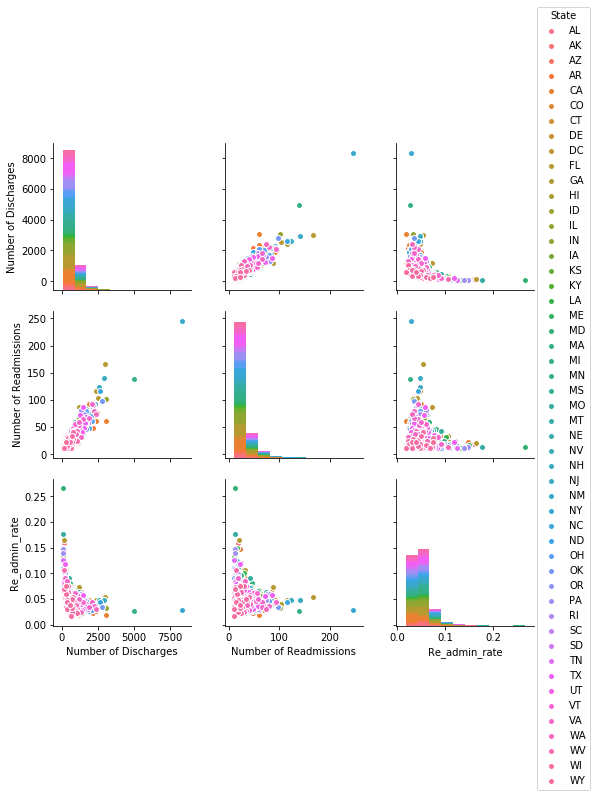

In [189]:
plt.figure(figsize=(15,5))
sns.pairplot(dg[dg['Reason']=='HIP-KNEE'],hue='State')

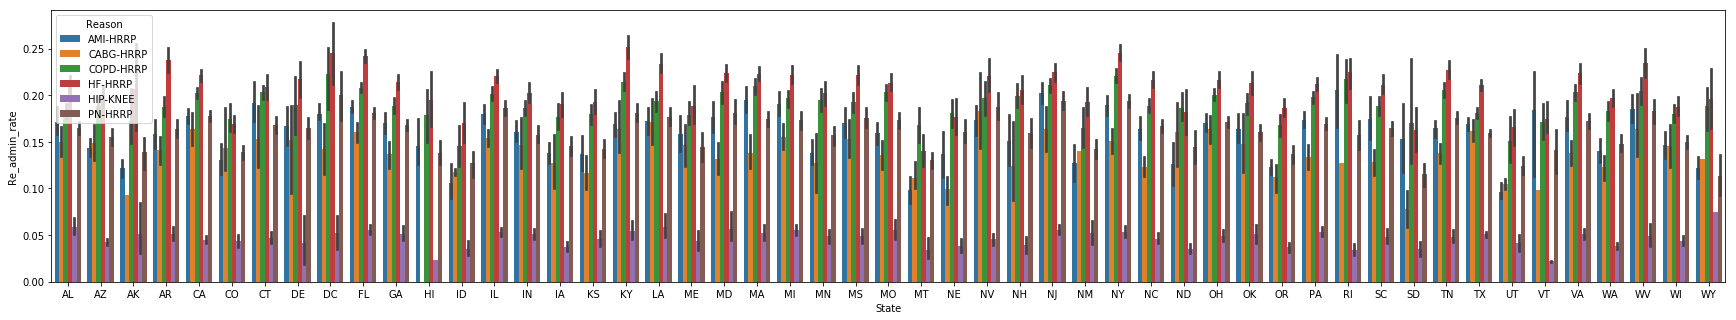

In [193]:
plt.figure(figsize=(30,5))
sns.barplot(x='State', y='Re_admin_rate', hue='Reason', data=dg)

(0.05, 0.4)

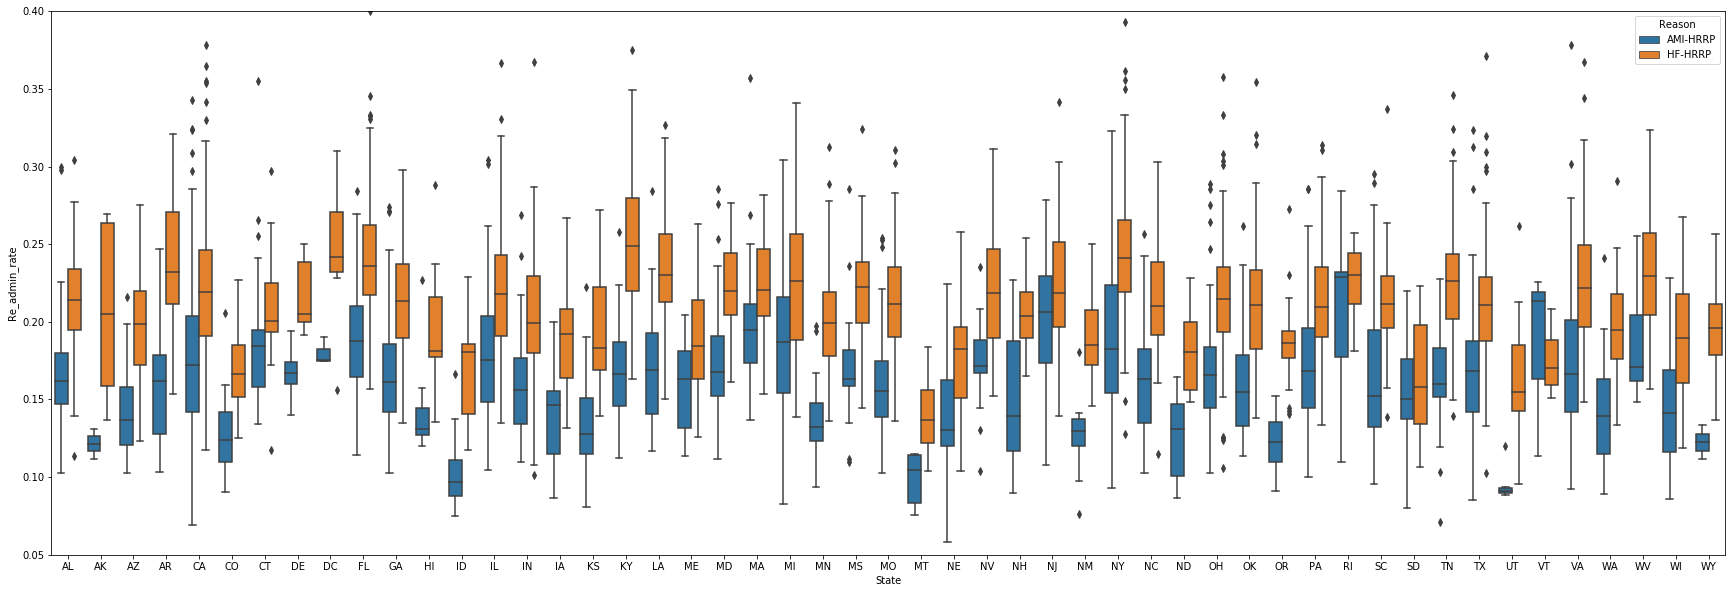

In [217]:
plt.figure(figsize=(30,10))
sns.boxplot(x='State', y='Re_admin_rate',hue='Reason',data=dg[(dg['Reason']=='HF-HRRP') | (dg['Reason']=='AMI-HRRP') ])
plt.ylim(0.05,0.4)

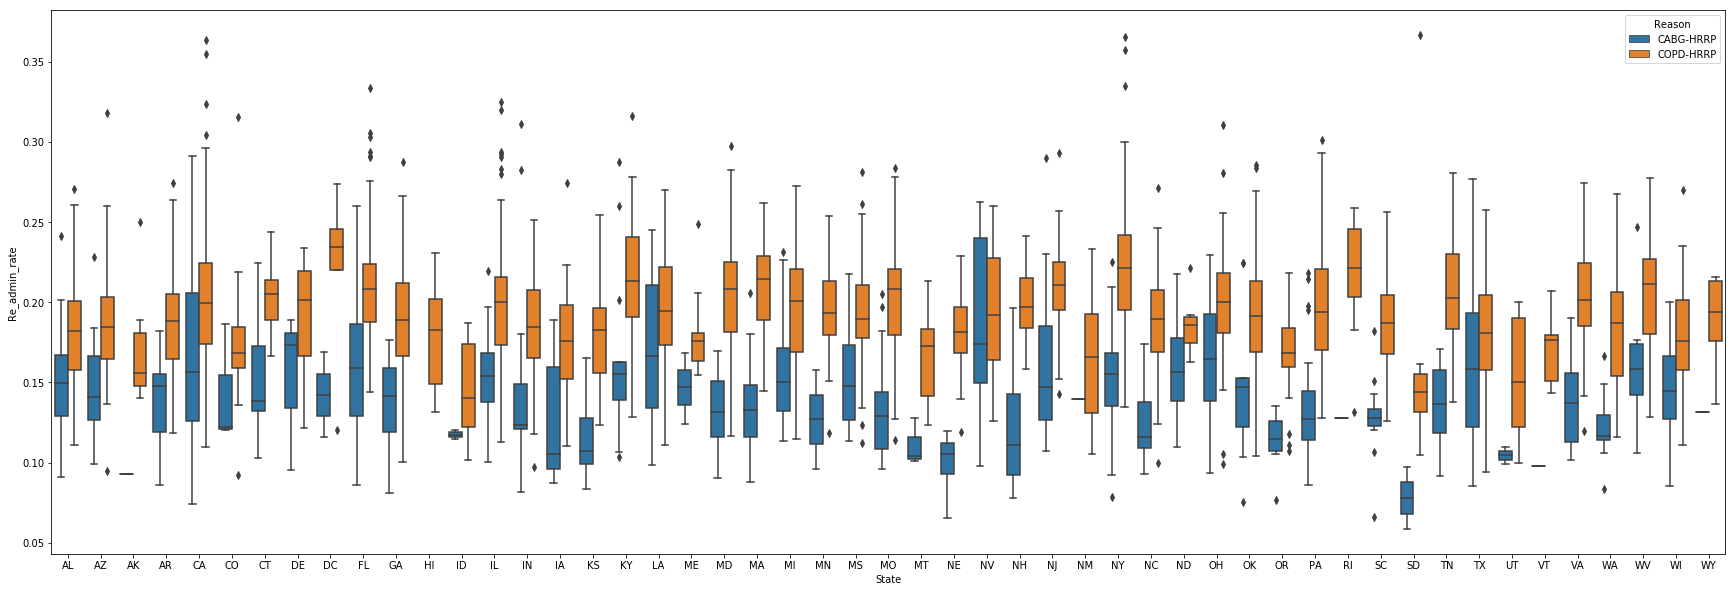

In [205]:
plt.figure(figsize=(30,10))
sns.boxplot(x='State', y='Re_admin_rate',hue='Reason',data=dg[(dg['Reason']=='COPD-HRRP') | (dg['Reason']=='CABG-HRRP')])

(0, 0.4)

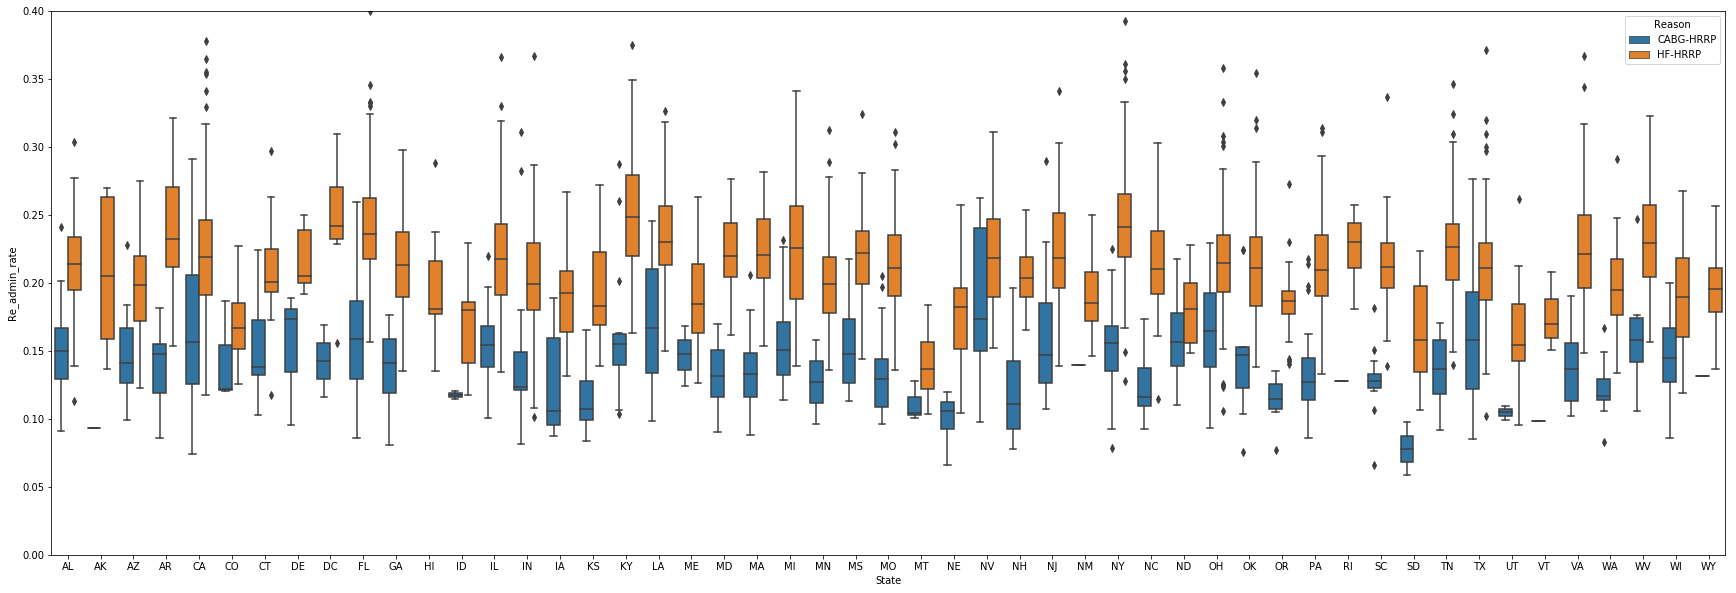

In [216]:
plt.figure(figsize=(30,10))
sns.boxplot(x='State', y='Re_admin_rate',hue='Reason',data=dg[(dg['Reason']=='HF-HRRP') | (dg['Reason']=='CABG-HRRP')])
plt.ylim(0,0.4)

(0, 0.1)

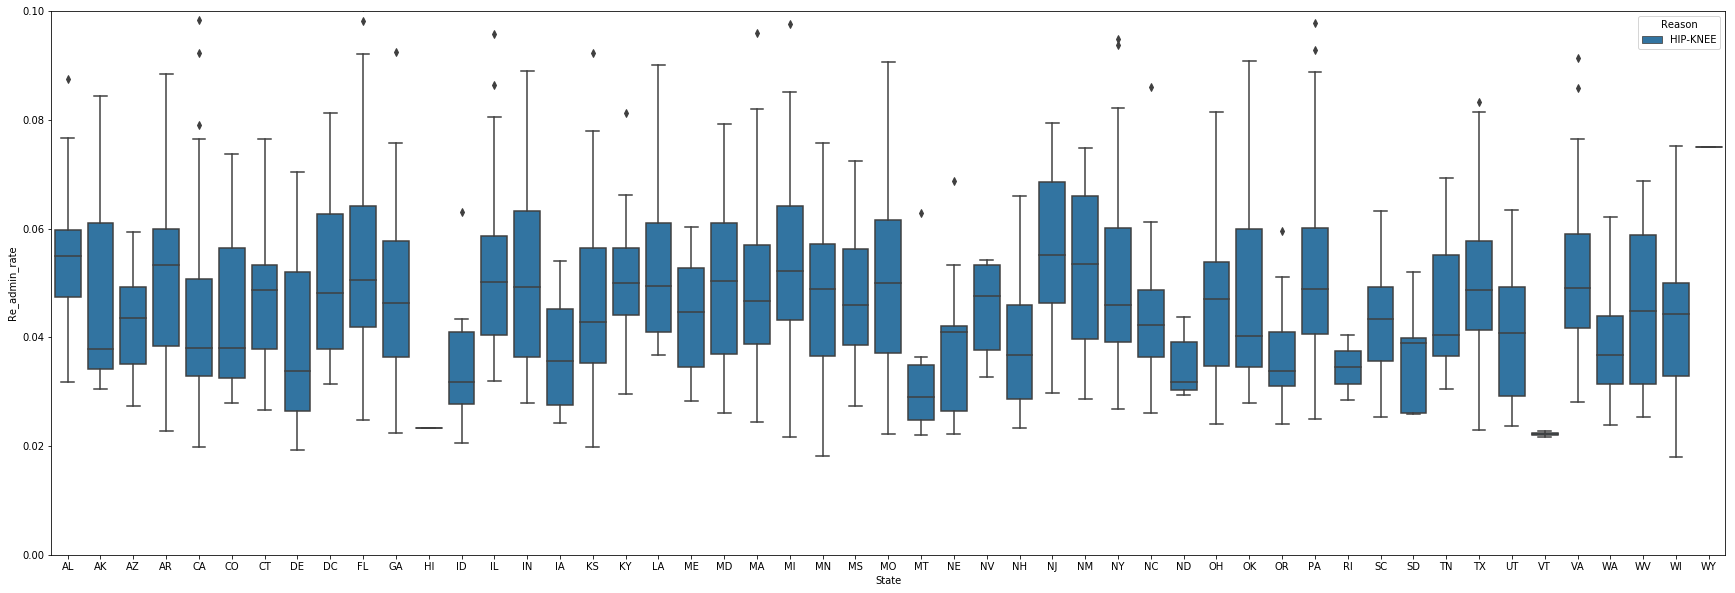

In [212]:
plt.figure(figsize=(30,10))
sns.boxplot(x='State', y='Re_admin_rate',hue='Reason',data=dg[(dg['Reason']=='HIP-KNEE')])
plt.ylim(0,.1)

(0.05, 0.4)

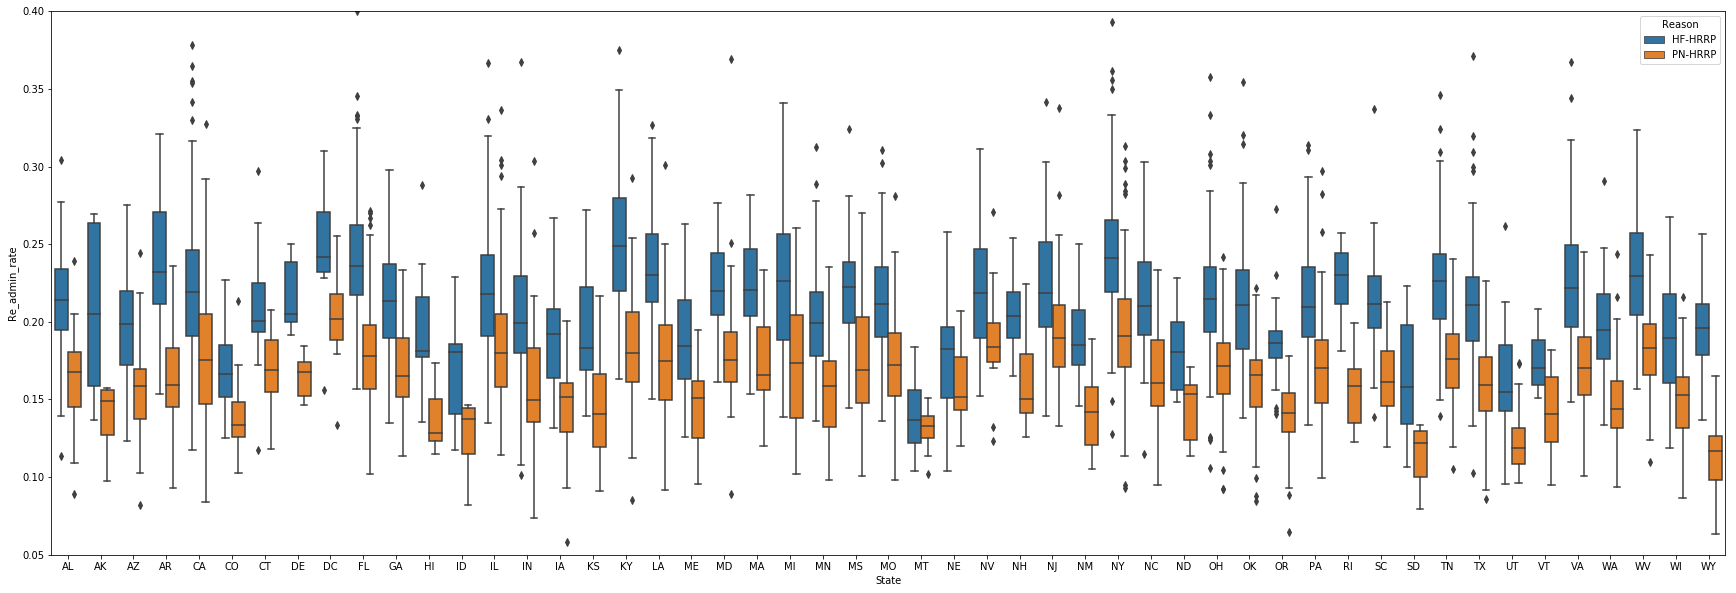

In [215]:
plt.figure(figsize=(30,10))
sns.boxplot(x='State', y='Re_admin_rate',hue='Reason',data=dg[(dg['Reason']=='HF-HRRP') | (dg['Reason']=='PN-HRRP')])
plt.ylim(0.05,.4)

In [220]:
p_dg=dg.pivot_table(index='State',columns='Reason',values='Re_admin_rate')

In [222]:
p_dg.head()

Reason,AMI-HRRP,CABG-HRRP,COPD-HRRP,HF-HRRP,HIP-KNEE,PN-HRRP
State,,,,,,
AK,0.121478,0.093220,0.172767,0.206782,0.050914,0.138607
AL,0.171662,0.150242,0.182179,0.211783,0.058887,0.164745
AR,0.158320,0.141515,0.187387,0.237882,0.051467,0.164024
AZ,0.143243,0.148821,0.188378,0.198291,0.042323,0.154773
CA,0.177824,0.164073,0.202387,0.221252,0.045129,0.177535


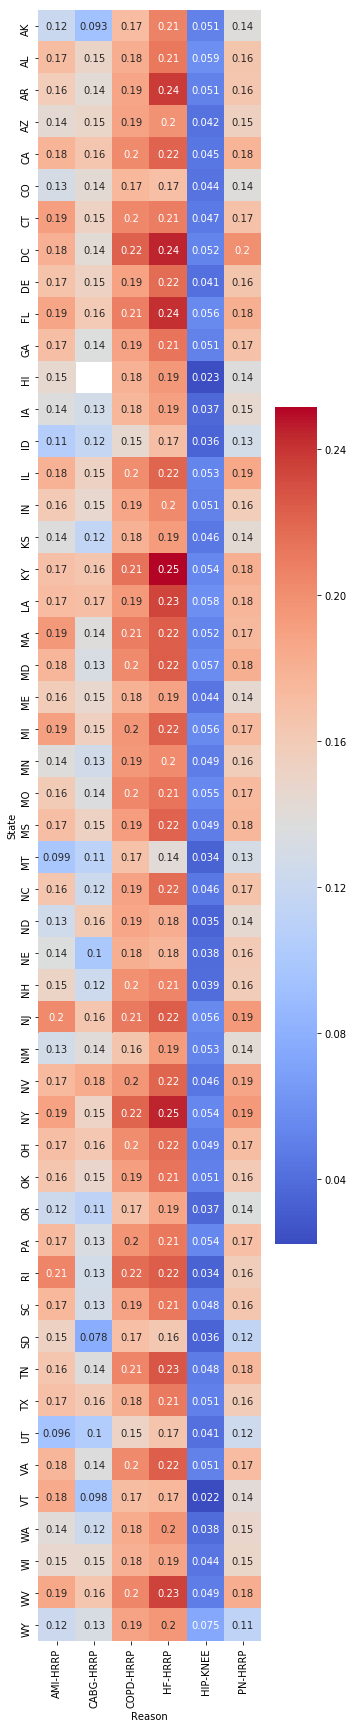

In [232]:
plt.figure(figsize=(5,30))
sns.heatmap(p_dg,cmap='coolwarm',annot=True)

<Figure size 360x2880 with 0 Axes>

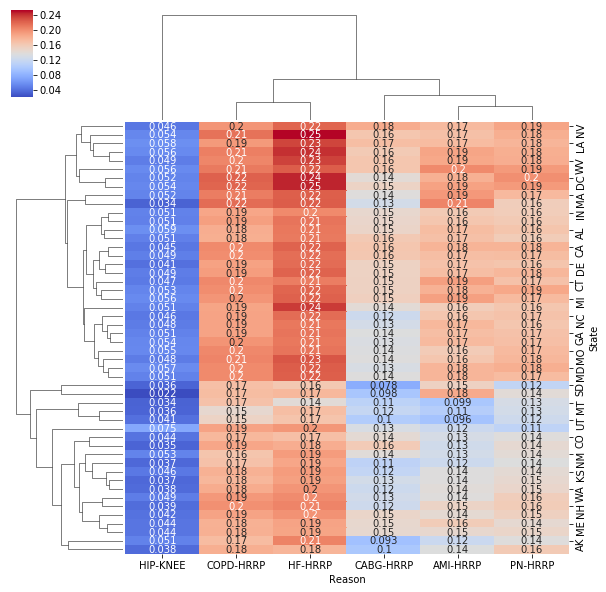

In [237]:
p_dgf=p_dg.dropna()
plt.figure(figsize=(5,40))
sns.clustermap(p_dgf,cmap='coolwarm',annot=True)

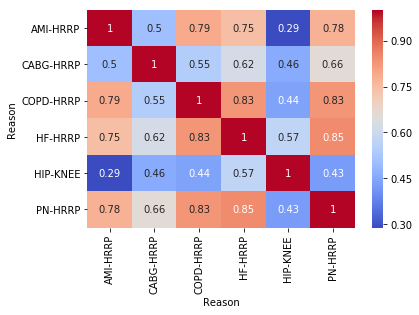

In [225]:
p_corr=p_dg.corr()
sns.heatmap(p_corr,cmap='coolwarm',annot=True)

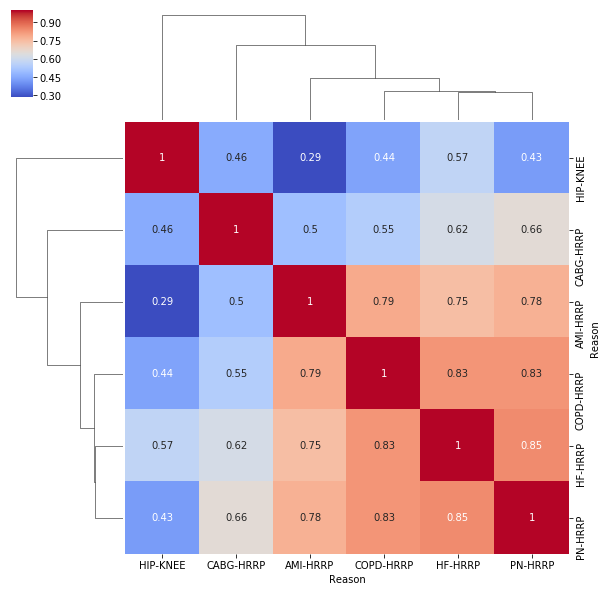

In [226]:
p_corr=p_dg.corr()
sns.clustermap(p_corr,cmap='coolwarm',annot=True)

In [39]:
df['Reason'].value_counts()

CABG-HRRP    3305
AMI-HRRP     3305
PN-HRRP      3305
HIP-KNEE     3305
HF-HRRP      3305
COPD-HRRP    3305
Name: Reason, dtype: int64

In [8]:
df['Measure Name'].value_counts()

READM-30-PN-HRRP          3305
READM-30-HIP-KNEE-HRRP    3305
READM-30-AMI-HRRP         3305
READM-30-COPD-HRRP        3305
READM-30-CABG-HRRP        3305
READM-30-HF-HRRP          3305
Name: Measure Name, dtype: int64

In [13]:
np.shape(df)

(19830, 12)

In [25]:
df['State'].value_counts().head()

TX    1872
CA    1782
FL    1026
NY     912
PA     900
Name: State, dtype: int64